In [ ]:
# このコードは変更しない
!pip install -U ccml2021
# You must restart the runtimeとメッセージが出たら、ランタイムを再起動する

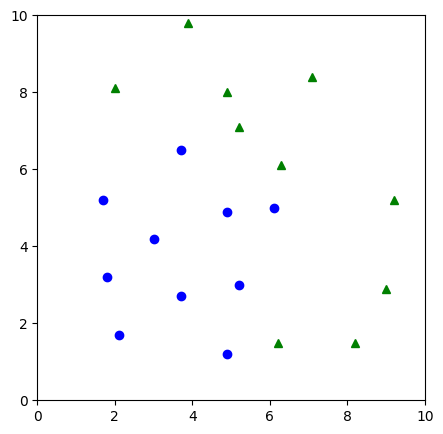

In [6]:
import pandas as pd

df = pd.read_csv('sample_classification.txt', sep='\t')
X_train = df[['x1', 'x2']]
y_train = df['y']

import numpy as np

x1 = np.arange(0, 10, 0.05)
x2 = np.arange(0, 10, 0.05)
X1, X2 = np.meshgrid(x1, x2)
X_test = pd.DataFrame(np.c_[X1.flatten(), X2.flatten()], columns=['x1', 'x2'])

import matplotlib.pyplot as plt
index_blue = df.index[df['y'] == 0]
index_green = df.index[df['y'] == 1]
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(1, 1, 1)
ax.plot(df.loc[index_blue, 'x1'], df.loc[index_blue, 'x2'], 'bo')
ax.plot(df.loc[index_green, 'x1'], df.loc[index_green, 'x2'], 'g^')
ax.set_xlim([0, 10])
ax.set_ylim([0, 10])
plt.show()

In [7]:
# support vector machine
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

model_svm = GridSearchCV(
    SVC(),
    param_grid={
        'gamma': [2**ii for ii in range(-5, 5)],
        'C': [2**ii for ii in range(-5, 5)],

    },
    cv=3
)
model_svm.fit(X_train, y_train)
y_test_pred = model_svm.predict(X_test)
y_test_pred_svm = y_test_pred.reshape(X1.shape)

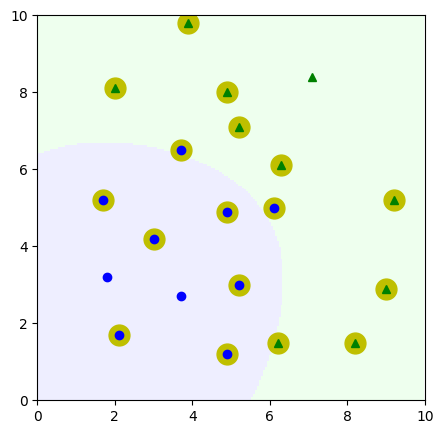

In [10]:
# 予測結果の描画
from matplotlib.colors import LinearSegmentedColormap

index_SV = model_svm.best_estimator_.support_
index_blue = df.index[df['y'] == 0]
index_green = df.index[df['y'] == 1]

cm = LinearSegmentedColormap.from_list(
    'custom_cmap',
    ['#eeeeff', '#eeffee']
)

fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(1, 1, 1)
ax.pcolormesh(X1, X2, y_test_pred_svm, cmap=cm)
ax.plot(df.loc[index_SV, 'x1'], df.loc[index_SV, 'x2'], 'yo', markersize=15)
ax.plot(df.loc[index_blue, 'x1'], df.loc[index_blue, 'x2'], 'bo')
ax.plot(df.loc[index_green, 'x1'], df.loc[index_green, 'x2'], 'g^')
ax.set_xlim([0, 10])
ax.set_ylim([0, 10])
fig.savefig('SVC.png')
plt.show()

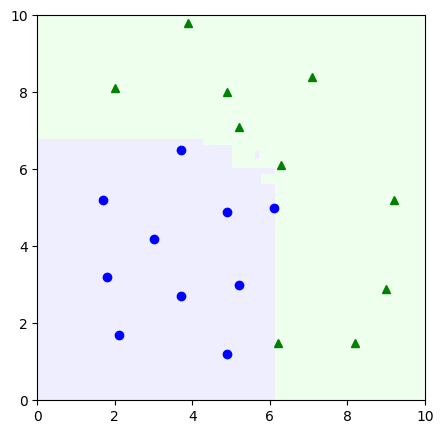

In [11]:
# RamdomForestClassifierを用いた予測
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier(n_estimators=500)
model_rf.fit(X_train, y_train)

y_test_pred = model_rf.predict(X_test)
y_test_pred_rf = y_test_pred.reshape(X1.shape)

# 予測結果の確認
cm = LinearSegmentedColormap.from_list(
    'custom_cmap',
    ['#eeeeff', '#eeffee']
)

fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(1, 1, 1)
ax.pcolormesh(X1, X2, y_test_pred_rf, cmap=cm)
ax.plot(df.loc[df['y'] == 0, 'x1'], df.loc[df['y'] == 0, 'x2'], 'bo')
ax.plot(df.loc[df['y'] == 1, 'x1'], df.loc[df['y'] == 1, 'x2'], 'g^')

ax.set_xlim([0, 10])
ax.set_ylim([0, 10])
fig.savefig('RandomForestClassifier.png')
plt.show()

## 考察記入欄

SVMのクラス領域は丸みを帯びているが、RandomForestClassifierの場合は直線で分けられているのが気になった。SVMは非線形カーネルを用いているため滑らかで丸みを帯びた決定境界が形成されるが、randomForestは各決定木が直線的な分割を繰り返すので全体として直線ベースの領域分割となるからである。

## 感想記入欄

SVMによる予測では、背景のクラス領域を色分けすることで、決定境界付近の変化を視覚的に確認できました。サポートベクトルの影響が大きく、各クラス間の境界がはっきりしていました。一方、RandomForestClassifierではSVMと比べて細かい決定境界を描くため、柔軟な分類が可能だと思いました。

## 変数名、ファイル名の最終チェック

以下のコードは変更しないでください。

実行することで、上のコードが想定通りの変数名、ファイル名を使用しているかをチェックできます。

In [ ]:
from ccml2021.checker import basic4_1

basic4_1(globals())